In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dat = pd.read_csv('data/preproc_lab_data_pub_20220218_nl.csv', dtype={'anon_producer':str})
dat.head()

,u_id,strain_slug,anon_producer,product_category,strain_category,strain_popularity,chemotype,has_cannabs,chemotype_ratio,tot_thc,...,humulene,caryophyllene,limonene,linalool,myrcene,bisabolol,b_pinene,a_terpinene,terpinolene,a_pinene
0,0,NaN,1046,FLOWER,None,NaN,THC-Dom,True,425.819531,20.103098,...,0.217018,0.560682,0.159195,0.032776,0.177072,0.029597,0.114252,0.010000,0.321310,0.075442
1,1,NaN,1046,FLOWER,None,NaN,THC-Dom,True,207.384250,17.775078,...,0.143383,0.315326,0.127196,0.010000,0.199761,0.010000,0.069859,0.012731,0.365565,0.060920
2,2,NaN,1046,FLOWER,None,NaN,THC-Dom,True,230.122927,18.196924,...,0.140367,0.306051,0.111072,0.022061,0.177568,0.010000,0.057884,0.011981,0.336826,0.049393
3,3,NaN,1046,FLOWER,None,NaN,THC-Dom,True,321.904704,19.302718,...,0.167629,0.385306,0.134872,0.056048,0.368547,0.048849,0.035711,0.000000,0.000000,0.020058
4,4,NaN,1046,FLOWER,None,NaN,THC-Dom,True,253.209507,18.224250,...,0.127600,0.317787,0.116072,0.029350,0.099418,0.010000,0.083642,0.010000,0.179980,0.056437


In [3]:
dat['chemotype'].unique()

array(['THC-Dom', 'CBD-Dom', 'Bal THC/CBD'], dtype=object)

In [4]:
dat.columns

Index(['u_id', 'strain_slug', 'anon_producer', 'product_category',
       'strain_category', 'strain_popularity', 'chemotype', 'has_cannabs',
       'chemotype_ratio', 'tot_thc', 'tot_cbd', 'tot_cbg', 'tot_cbc',
       'tot_cbn', 'tot_thcv', 'has_terps', 'total_terps', 'terp_var',
       'top_terp_f', 'tot_ocimene', 'camphene', 'g_terpinene',
       'tot_nerolidol_ct', 'humulene', 'caryophyllene', 'limonene', 'linalool',
       'myrcene', 'bisabolol', 'b_pinene', 'a_terpinene', 'terpinolene',
       'a_pinene'],
      dtype='object')

In [5]:
dat['strain_category'].unique()

array(['None', 'Hybrid', 'Indica', 'Sativa'], dtype=object)

In [6]:
dat['strain_popularity'].unique()

array([       nan, 0.06326198, 0.0097445 , ..., 0.00038901, 0.0319731 ,
       0.00281685])

In [7]:
dat = dat.dropna()
df = dat[['chemotype', 'tot_thc', 'tot_cbd', 'myrcene', 'linalool', 'a_terpinene', 'g_terpinene']]
df

,chemotype,tot_thc,tot_cbd,myrcene,linalool,a_terpinene,g_terpinene
10,THC-Dom,20.772720,0.054472,1.640925,0.114341,0.0,0.01
11,THC-Dom,19.089005,0.057215,2.439003,0.149473,0.0,0.01
23,THC-Dom,19.352578,0.061449,0.617441,0.229732,0.0,0.01
24,THC-Dom,17.532786,0.048961,0.307701,0.110549,0.0,0.00
25,THC-Dom,20.379907,0.048114,0.214784,0.239568,0.0,0.00
...,...,...,...,...,...,...,...
88257,THC-Dom,26.597920,0.061390,0.205000,0.112000,0.0,0.00
88559,THC-Dom,18.716040,0.061390,1.550000,0.139000,0.0,0.00
88980,THC-Dom,14.578580,0.043850,0.533000,0.030000,0.0,0.00
88998,THC-Dom,19.447800,0.052620,1.517000,0.139000,0.0,0.00


In [8]:
cor_canab = df.corr(numeric_only = True)
cor_canab

,tot_thc,tot_cbd,myrcene,linalool,a_terpinene,g_terpinene
tot_thc,1.000000,-0.527098,0.053250,0.229923,0.017759,0.022114
tot_cbd,-0.527098,1.000000,0.051589,-0.050483,0.003832,0.001333
myrcene,0.053250,0.051589,1.000000,-0.040251,-0.056392,-0.096403
linalool,0.229923,-0.050483,-0.040251,1.000000,-0.033820,0.266214
a_terpinene,0.017759,0.003832,-0.056392,-0.033820,1.000000,0.061941
g_terpinene,0.022114,0.001333,-0.096403,0.266214,0.061941,1.000000


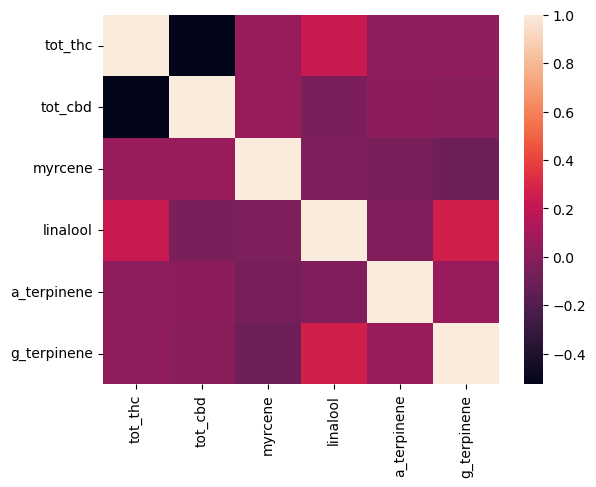

In [9]:
sns.heatmap(cor_canab);

In [10]:
grouped_df = df.groupby('chemotype').sum()
grouped_df

,tot_thc,tot_cbd,myrcene,linalool,a_terpinene,g_terpinene
chemotype,,,,,,
Bal THC/CBD,2455.786482,3025.034601,191.895258,25.528049,6.258698,2.972826
CBD-Dom,180.446071,3902.096502,143.546856,18.447930,3.253000,1.658328
THC-Dom,323130.139244,1078.854532,7222.437635,1785.754074,220.406883,117.679854


In [11]:
grouped_df['myrcene'] / grouped_df['tot_thc']

chemotype
Bal THC/CBD    0.078140
CBD-Dom        0.795511
THC-Dom        0.022351
dtype: float64

In [12]:
grouped_df['linalool'] / grouped_df['tot_thc']

chemotype
Bal THC/CBD    0.010395
CBD-Dom        0.102235
THC-Dom        0.005526
dtype: float64

In [13]:
grouped_df['a_terpinene'] / grouped_df['tot_thc']

chemotype
Bal THC/CBD    0.002549
CBD-Dom        0.018028
THC-Dom        0.000682
dtype: float64

In [14]:
grouped_df['g_terpinene'] / grouped_df['tot_thc']

chemotype
Bal THC/CBD    0.001211
CBD-Dom        0.009190
THC-Dom        0.000364
dtype: float64

In [15]:
grouped_df['myrcene'] / grouped_df['tot_cbd']

chemotype
Bal THC/CBD    0.063436
CBD-Dom        0.036787
THC-Dom        6.694543
dtype: float64

In [16]:
grouped_df['linalool'] / grouped_df['tot_cbd']

chemotype
Bal THC/CBD    0.008439
CBD-Dom        0.004728
THC-Dom        1.655232
dtype: float64

In [17]:
grouped_df['a_terpinene'] / grouped_df['tot_cbd']

chemotype
Bal THC/CBD    0.002069
CBD-Dom        0.000834
THC-Dom        0.204297
dtype: float64

In [18]:
grouped_df['g_terpinene'] / grouped_df['tot_cbd']

chemotype
Bal THC/CBD    0.000983
CBD-Dom        0.000425
THC-Dom        0.109079
dtype: float64